In [ ]:
## 데이터 불러오기

In [10]:
from PIL import Image
import glob
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 가위 이미지 사이즈 변경하기

In [11]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


## 바위 이미지 사이즈 변경하기

In [12]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


## 보 이미지 사이즈 변경하기

In [13]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


## 라벨링 시켜주기

In [14]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_trian shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_trian shape: (300, 28, 28, 3)
y_train shape: (300,)


## 이미지 불러와서 확인하기

라벨:  0
[[[222 249 255]
  [226 253 255]
  [227 254 255]
  ...
  [ 87 102  99]
  [ 86 101  98]
  [ 84  98  98]]

 [[231 255 255]
  [232 255 255]
  [231 255 255]
  ...
  [ 88 100  96]
  [ 85 100  97]
  [ 84  99  96]]

 [[234 255 255]
  [232 254 255]
  [224 247 255]
  ...
  [ 88 100  96]
  [ 85 100  95]
  [ 84  99  96]]

 ...

 [[159 162 133]
  [163 170 139]
  [164 173 144]
  ...
  [ 40  46  42]
  [ 50  55  51]
  [105 110 104]]

 [[157 158 127]
  [161 164 133]
  [162 169 138]
  ...
  [  9  15  15]
  [ 22  28  26]
  [ 79  84  80]]

 [[156 155 124]
  [161 162 131]
  [161 166 136]
  ...
  [ 22  30  33]
  [ 28  33  36]
  [ 78  82  81]]]


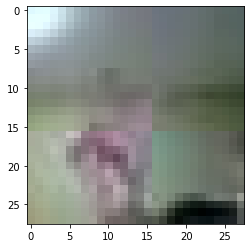

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])
print(x_train[0])

## 네트워크 설계하기

In [16]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

## 딥러닝 네트워크 설계

In [17]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


## 딥러닝 네트워크 학습시키기

In [18]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))


x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.


print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)


## x_train 학습 데이터로 딥러닝 네트워크 학습 시키기

In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 27s 20ms/step - loss: 1.0981 - accuracy: 0.4033
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0739 - accuracy: 0.4900
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0503 - accuracy: 0.7367
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0005 - accuracy: 0.7867
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9124 - accuracy: 0.9433
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7772 - accuracy: 0.9667
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5926 - accuracy: 0.9833
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.9833
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9867
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1655 - accuracy: 0.9867


## 학습시킨 데이터 추론하기

In [20]:
predicted_result = model.predict(x_train_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)
idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_train[idx])

model.predict() 결과 :  [0.96497834 0.02457262 0.01044908]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


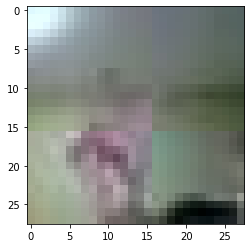

In [21]:
plt.imshow(x_train[idx],cmap=plt.cm.binary)
plt.show()

## test 데이터 만들기

In [22]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [23]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [24]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [25]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0
[[[143 154 150]
  [142 153 149]
  [143 152 149]
  ...
  [103 109 107]
  [102 108 104]
  [101 108 101]]

 [[135 146 142]
  [135 146 142]
  [135 146 142]
  ...
  [102 108 104]
  [102 107 103]
  [101 106 100]]

 [[128 140 138]
  [129 141 139]
  [131 141 140]
  ...
  [ 98 103  99]
  [ 97 102  96]
  [ 98 101  94]]

 ...

 [[183 146 101]
  [152 118  72]
  [159 127  80]
  ...
  [207 149 127]
  [178 118 128]
  [149  92 107]]

 [[166 129  84]
  [154 120  74]
  [170 138  91]
  ...
  [214 146 125]
  [186 114 125]
  [159  88 106]]

 [[150 113  68]
  [155 118  73]
  [179 147 100]
  ...
  [219 144 123]
  [190 113 123]
  [163  86 104]]]


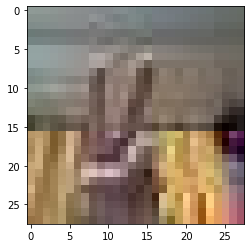

In [26]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[0])
print(x_test[0])

In [27]:

print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)


print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


## test 데이터로 성능 시험하기

In [28]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 3.4200 - accuracy: 0.3333
test_loss: 3.419964075088501 
test_accuracy: 0.3333333432674408


In [29]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.8571795  0.13479634 0.00802421]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


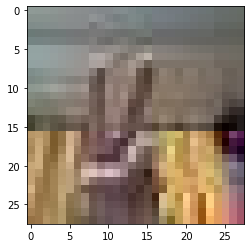

In [30]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

## test_accuracy 측정하기

예측확률분포: [0.991037   0.00367227 0.0052907 ]
라벨: 1, 예측결과: 0


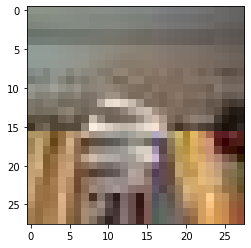

예측확률분포: [9.914454e-01 8.518329e-03 3.624290e-05]
라벨: 1, 예측결과: 0


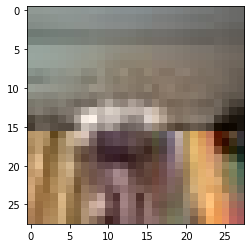

예측확률분포: [0.99240375 0.00446219 0.00313413]
라벨: 2, 예측결과: 0


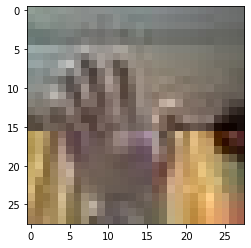

예측확률분포: [0.9941772  0.00208807 0.00373464]
라벨: 2, 예측결과: 0


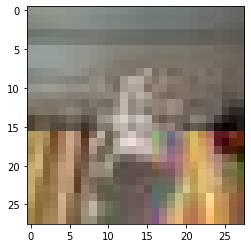

예측확률분포: [0.99183196 0.00471877 0.00344928]
라벨: 2, 예측결과: 0


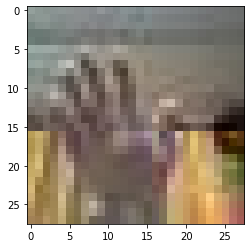

In [32]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 회고

이번 프로젝트는 정말 정말 어렵지 않은게 하나도 없었던거 같습니다 ㅠ...ㅠ
일단 코드 자체도 어려웠는데 코드를 실행시켰을때 나오는 오류들을 수정하는게 정말 힘들었고
딥러닝 네트워크를 설계하고 학습시키는게 이번이 처음이라 과정과 내용을 이해하는것 또한 힘들었습니다.

이번 프로젝트를 진행하면서 train과 test의 차이점은 확실히 알게된거 같습니다.
하지만 아직 개념만 알게되어서 문제를 주고 직접 코드를 만들어야 하면 아직은 코드를 만들지 못할꺼 같습니다.

이번 평가 지표를 맞추기 위해서 코드를 만지거나 여러번 학습을 시킨다거나 그런 시도는 아직까지는 실력이 부족해서 못했지만 
웹켐에서 사진을 찍을때 손모양을 바꿔가면서 인식율이 100프로 가까이 나오게 하려고 여러번 사진을 찍었습니다.

정확도가 60프로가 넘지 못한 이유를 한번 생각해 봤는데 잘은 모르겠지만 일단은 학습시킨 데이터의 양이 
너무 부족한게 아닌가 라는 생각을 해봤습니다.

이번에 프로젝트를 진행하면서 다시 한번 느낀 부분이지만 저는 기본적인 코드도 잘 이해를 못하기 때문에
다른 분들 속도에 맞출께 아니라 공부할때 완전 기초부터 천천히 이해하면서 다른 분들을 따라가야겠다고 생각 했습니다.